<a href="https://colab.research.google.com/github/Srtharan/CNN-RCNN/blob/main/run_XGBoost_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
birdy654_cifake_real_and_ai_generated_synthetic_images_path = kagglehub.dataset_download('birdy654/cifake-real-and-ai-generated-synthetic-images')

print('Data source import complete.')


100%|██████████| 105M/105M [00:00<00:00, 114MB/s] 

Extracting files...


Data source import complete.


In [ ]:
print(birdy654_cifake_real_and_ai_generated_synthetic_images_path)

/root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os

# Path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3'

# List all files in the directory
files = os.listdir(dataset_path)
print(files)


['test', 'train']


In [ ]:
import os

# Path to train and test directories
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

# List files in the 'train' and 'test' directories
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

print("Train files:", train_files)
print("Test files:", test_files)


Train files: ['FAKE', 'REAL']
Test files: ['FAKE', 'REAL']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

# Set the paths for training and testing data
train_dir = '/root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/train'
test_dir = '/root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/test'

# Check the directory structure (optional)
print("Train directory structure:", os.listdir(train_dir))
print("Test directory structure:", os.listdir(test_dir))

# Image data generators for loading and augmenting images
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalizing pixel values to [0, 1]
    rotation_range=20,     # Random rotations
    width_shift_range=0.2, # Random horizontal shifts
    height_shift_range=0.2, # Random vertical shifts
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'    # Fill pixels after transformation
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Flow images from directories (train and test)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),  # CIFAR-10 image size
    batch_size=64,
    class_mode='binary'     # Binary classification (FAKE or REAL)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),  # CIFAR-10 image size
    batch_size=64,
    class_mode='binary'
)

# CNN Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,           # Number of epochs (can be adjusted)
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


Train directory structure: ['FAKE', 'REAL']
Test directory structure: ['FAKE', 'REAL']
Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 273s 173ms/step - accuracy: 0.7353 - loss: 0.5145 - val_accuracy: 0.7642 - val_loss: 0.5099
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 305s 162ms/step - accuracy: 0.8452 - loss: 0.3539 - val_accuracy: 0.8138 - val_loss: 0.4466
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 249s 154ms/step - accuracy: 0.8610 - loss: 0.3211 - val_accuracy: 0.8006 - val_loss: 0.4753
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 243s 155ms/step - accuracy: 0.8729 - loss: 0.2949 - val_accuracy: 0.8641 - val_loss: 0.3529
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 258s 153ms/step - accuracy: 0.8836 - loss: 0.2786 - val_accuracy: 0.8288 - val_loss: 0.4304
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 239s 153ms/step - accuracy: 0.8851 - loss: 0.2703 - val_accuracy: 0.8486 - val_loss: 0.3742
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 240s 153ms/step - accuracy: 0.8901 - loss: 0.2598 - val_accuracy: 0.8492 - val_loss: 0.3568
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 236s 151ms/step - accuracy: 0.8

# with xgboost extension

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.metrics import accuracy_score

# Get the features from the training set using the CNN
train_features = model.predict(train_generator, verbose=1)

# Get the labels from the training set
train_labels = train_generator.classes

# Get the features from the test set using the CNN
test_features = model.predict(test_generator, verbose=1)

# Get the labels from the test set
test_labels = test_generator.classes

# Flatten the features into 1D vectors for XGBoost
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step


In [ ]:
import xgboost as xgb  # XGBoost library
from sklearn.metrics import accuracy_score  # To calculate accuracy

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Fit the XGBoost model on the extracted features and labels
xgb_model.fit(train_features_flat, train_labels)

# Evaluate the XGBoost model on the test set
test_preds = xgb_model.predict(test_features_flat)
test_acc = accuracy_score(test_labels, test_preds)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test accuracy with XGBoost: {test_acc:.4f}")

Test accuracy: 0.4956
Test accuracy with XGBoost: 0.4956


# VGG16

In [ ]:
import numpy as np
from keras.applications import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
import os
import cv2

# Load the pre-trained VGG16 model without the top layers (no fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Create a feature extraction model by adding a GlobalAveragePooling2D layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Function to load images and preprocess them for VGG16
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)  # Convert image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image to range [0, 1]
    return img_array

# Example: Load an image from the test dataset (you can load your own images here)
test_image_path = "/root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/train/REAL/0000 (10).jpg"
img = load_and_preprocess_image(test_image_path)

# Extract features using VGG16
features = feature_extractor.predict(img)
print("Extracted Features Shape:", features.shape)

# You can reshape these features (if needed) to use them with a classifier
features_flat = features.reshape(1, -1)  # Flatten the features into a single vector
print("Flattened Features Shape:", features_flat.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Extracted Features Shape: (1, 7, 7, 512)
Flattened Features Shape: (1, 25088)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming `train_features_flat` and `train_labels` contain the features and labels of the training data

# Train-test split for training XGBoost
X_train, X_val, y_train, y_val = train_test_split(train_features_flat, train_labels, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
val_preds = xgb_model.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)
print(f"Validation accuracy with VGG16 features + XGBoost: {val_acc:.4f}")

# Now you can use this model to predict on the test set:
test_preds = xgb_model.predict(test_features_flat)
test_acc = accuracy_score(test_labels, test_preds)
print(f"Test accuracy with VGG16 features + XGBoost: {test_acc:.4f}")


Validation accuracy with VGG16 features + XGBoost: 0.5051
Test accuracy with VGG16 features + XGBoost: 0.5005


# Visualisation

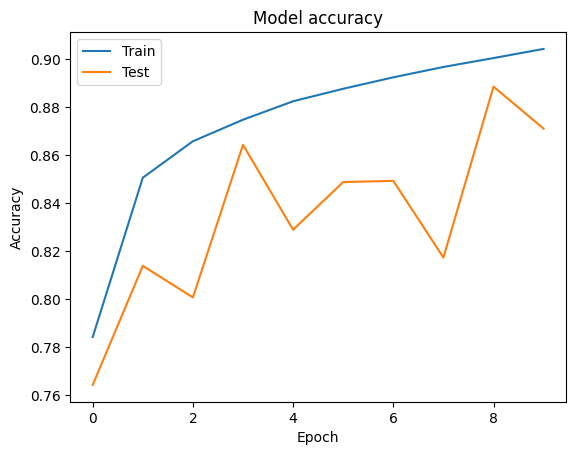

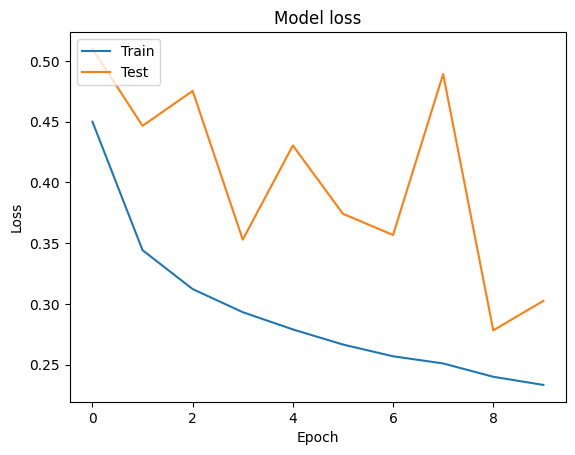

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Validation

Enter the path to the image you want to predict: /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/train/FAKE/1000 (10).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
prediction: [[0.0394498]]


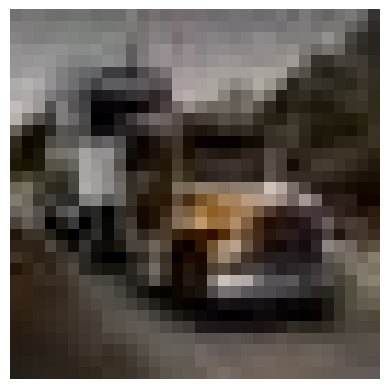

The image is FAKE.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to load an image and make a prediction
def predict_image(img_path, model):
    # Load the image with target size (32, 32)
    img = image.load_img(img_path, target_size=(32, 32))

    # Convert the image to an array and normalize
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]

    # Reshape the image to match the input shape (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    print('prediction:', prediction)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    # Return the result based on prediction
    if prediction > 0.5:
        return "REAL"
    else:
        return "FAKE"

# Example usage:
# Assuming your model is trained and saved in the variable `model`
img_path = input("Enter the path to the image you want to predict: ")
result = predict_image(img_path, model)
print(f"The image is {result}.")


Enter the path to the image you want to predict: /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3/train/REAL/0001 (6).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
prediction: [[0.7754986]]


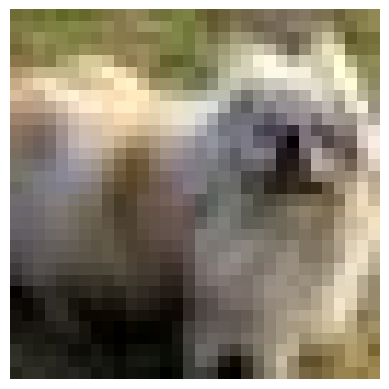

The image is REAL.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to load an image and make a prediction
def predict_image(img_path, model):
    # Load the image with target size (32, 32)
    img = image.load_img(img_path, target_size=(32, 32))

    # Convert the image to an array and normalize
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]

    # Reshape the image to match the input shape (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    print('prediction:', prediction)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    # Return the result based on prediction
    if prediction > 0.5:
        return "REAL"
    else:
        return "FAKE"

# Example usage:
# Assuming your model is trained and saved in the variable `model`
img_path = input("Enter the path to the image you want to predict: ")
result = predict_image(img_path, model)
print(f"The image is {result}.")
